In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
Species= data.Species

In [4]:
del data['Species']

In [5]:
from sklearn.cluster import KMeans

In [6]:
ks=range(1,11)
inertias=[]

for k in ks:
    #create a Kmeans instance with k clusters: mode
    #inertia is within cluster sum of square
    model= KMeans(n_clusters=k)
    
    #fit the model to samples
    model.fit(data.values)
    
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)

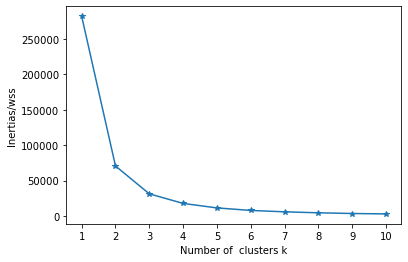

In [7]:
#plot ks vs inertias/wss
plt.plot(ks,inertias,'-*')
plt.xlabel('Number of  clusters k')
plt.ylabel('Inertias/wss')
plt.xticks(ks)
plt.show()

In [8]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(data.values)

In [9]:
df=pd.DataFrame({'labels':labels, 'Species':Species})

In [10]:
ct=pd.crosstab(df['labels'], df['Species'])
ct

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,50,0,0
1,0,0,50
2,0,50,0


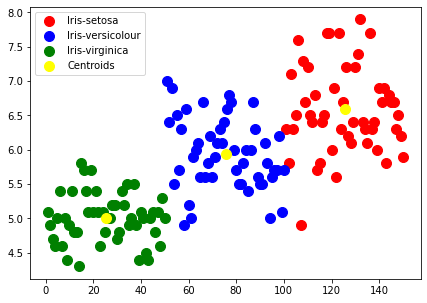

In [11]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7,5))
plt.scatter(data.values[labels == 1, 0], data.values[labels == 1, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(data.values[labels == 2, 0], data.values[labels == 2, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(data.values[labels == 0, 0], data.values[labels == 0, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()